# Student Performace Analysis

About This database contains 8 attributes.
Attribute Information:

> 1.gender = gender as male or female

> 2.race/ethinicity = race/ethincity of a person (group A, group B, group C, group D, group D)

> 3.parental level of education = highest level education of the parent (bachelor's degree, some college, master's degree,
       associate's degree, high school, some high school)

> 4.lunch = the type of lunch the student receives (standard, free/reduced)

> 5.test preparation course = if the student has completed the test preparation course or not (completed, none)

> 6.math score = student's score in mathematics

> 7.reading score = student's score in reading

> 8.writing score = student's score in writing

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads\\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['final score'] = df['math score'] + df['reading score'] + df['writing score']

In [5]:
df.drop('lunch', axis = 1, inplace = True)

In [6]:
df

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score
0,female,group B,bachelor's degree,none,72,72,74,218
1,female,group C,some college,completed,69,90,88,247
2,female,group B,master's degree,none,90,95,93,278
3,male,group A,associate's degree,none,47,57,44,148
4,male,group C,some college,none,76,78,75,229
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,282
996,male,group C,high school,none,62,55,55,172
997,female,group C,high school,completed,59,71,65,195
998,female,group D,some college,completed,68,78,77,223


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
final score                    0
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score,final score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [9]:
math_pass = df['math score'].quantile(0.95)
math_pass

90.04999999999995

In [10]:
df['Math_PassStatus'] = np.where(df['math score']< math_pass, 'F', 'P')
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score,Math_PassStatus
0,female,group B,bachelor's degree,none,72,72,74,218,F
1,female,group C,some college,completed,69,90,88,247,F
2,female,group B,master's degree,none,90,95,93,278,F
3,male,group A,associate's degree,none,47,57,44,148,F
4,male,group C,some college,none,76,78,75,229,F


In [11]:
reading_pass = df['reading score'].quantile(0.90)
reading_pass

87.10000000000002

In [12]:
df['Reading_PassStatus'] = np.where(df['reading score']< reading_pass, 'F', 'P')
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score,Math_PassStatus,Reading_PassStatus
0,female,group B,bachelor's degree,none,72,72,74,218,F,F
1,female,group C,some college,completed,69,90,88,247,F,P
2,female,group B,master's degree,none,90,95,93,278,F,P
3,male,group A,associate's degree,none,47,57,44,148,F,F
4,male,group C,some college,none,76,78,75,229,F,F


In [13]:
writing_pass = df['writing score'].quantile(0.95)
writing_pass

92.0

In [14]:
df['Writing_PassStatus'] = np.where(df['writing score']< writing_pass, 'F', 'P')
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group B,bachelor's degree,none,72,72,74,218,F,F,F
1,female,group C,some college,completed,69,90,88,247,F,P,F
2,female,group B,master's degree,none,90,95,93,278,F,P,P
3,male,group A,associate's degree,none,47,57,44,148,F,F,F
4,male,group C,some college,none,76,78,75,229,F,F,F


In [15]:
final_pass = df['final score'].quantile(0.9)
final_pass

258.0

In [16]:
df['Final_PassStatus'] = np.where((df['final score'] > writing_pass) & 
                                  (df['Math_PassStatus'] == 'P') & 
                                  (df['Reading_PassStatus'] == 'P') & 
                                  (df['Writing_PassStatus'] == 'P'), 'P', 'F')
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Final_PassStatus
0,female,group B,bachelor's degree,none,72,72,74,218,F,F,F,F
1,female,group C,some college,completed,69,90,88,247,F,P,F,F
2,female,group B,master's degree,none,90,95,93,278,F,P,P,F
3,male,group A,associate's degree,none,47,57,44,148,F,F,F,F
4,male,group C,some college,none,76,78,75,229,F,F,F,F


In [17]:
df['Final_PassStatus'][df['Final_PassStatus'] == 'P'].value_counts()

P    24
Name: Final_PassStatus, dtype: int64

In [18]:
passed = df[df['Final_PassStatus'] == 'P'].copy()
passed

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Final_PassStatus
114,female,group E,bachelor's degree,completed,99,100,100,299,P,P,P,P
121,male,group B,associate's degree,completed,91,89,92,272,P,P,P,P
149,male,group E,associate's degree,completed,100,100,93,293,P,P,P,P
165,female,group C,bachelor's degree,completed,96,100,100,296,P,P,P,P
179,female,group D,some high school,completed,97,100,100,297,P,P,P,P
451,female,group E,some college,none,100,92,97,289,P,P,P,P
458,female,group E,bachelor's degree,none,100,100,100,300,P,P,P,P
503,female,group E,associate's degree,completed,95,89,92,276,P,P,P,P
546,female,group A,some high school,completed,92,100,97,289,P,P,P,P
562,male,group C,bachelor's degree,completed,96,90,92,278,P,P,P,P


In [19]:
failed = df[df['Final_PassStatus'] == 'F'].copy()
failed

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Final_PassStatus
0,female,group B,bachelor's degree,none,72,72,74,218,F,F,F,F
1,female,group C,some college,completed,69,90,88,247,F,P,F,F
2,female,group B,master's degree,none,90,95,93,278,F,P,P,F
3,male,group A,associate's degree,none,47,57,44,148,F,F,F,F
4,male,group C,some college,none,76,78,75,229,F,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,282,F,P,P,F
996,male,group C,high school,none,62,55,55,172,F,F,F,F
997,female,group C,high school,completed,59,71,65,195,F,F,F,F
998,female,group D,some college,completed,68,78,77,223,F,F,F,F


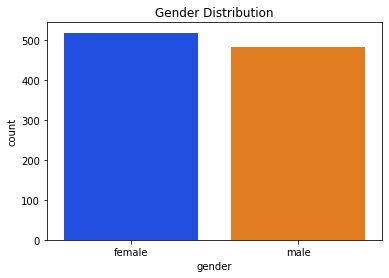

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Gender Distribution')
sns.countplot(x="gender", data = df, palette="bright")
plt.show()

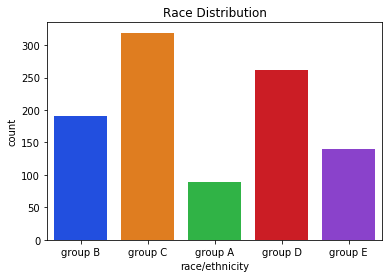

In [21]:
plt.title('Race Distribution')
sns.countplot(x="race/ethnicity", data = df, palette="bright")
plt.show()

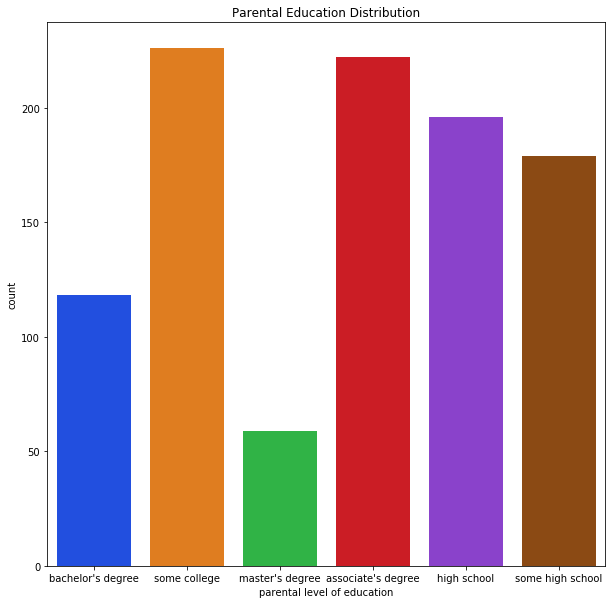

In [22]:
plt.figure(figsize = (10,10))
plt.title('Parental Education Distribution')
sns.countplot(x="parental level of education", data = df, palette="bright")
plt.show()

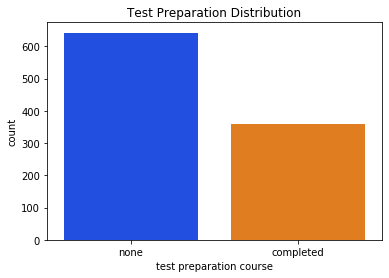

In [23]:
plt.title('Test Preparation Distribution')
sns.countplot(x="test preparation course", data = df, palette="bright")
plt.show()

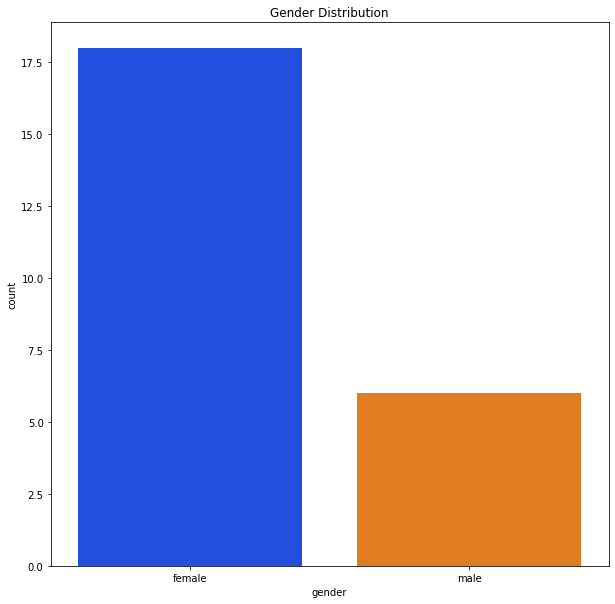

In [24]:
plt.figure(figsize = (10,10))
plt.title('Gender Distribution')
sns.countplot(x="gender", data = passed, palette="bright")
plt.show()

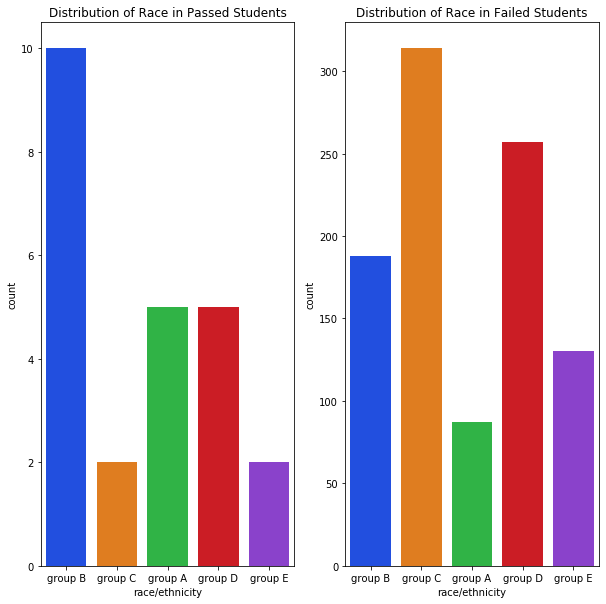

In [25]:
f, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True)
plt.title('Race Distribution')
axes[0].set_title('Distribution of Race in Passed Students')
sns.countplot(x="race/ethnicity", data = passed, palette="bright", ax = axes[0])
axes[1].set_title('Distribution of Race in Failed Students')
sns.countplot(x="race/ethnicity", data = failed, palette="bright", ax = axes[1])
plt.show()

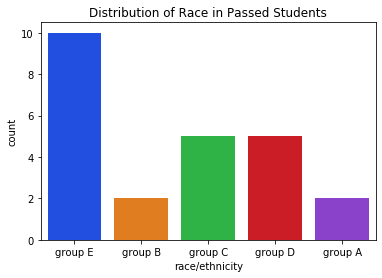

In [26]:
plt.title('Distribution of Race in Passed Students')
sns.countplot(x="race/ethnicity", data = passed, palette="bright")
plt.show()

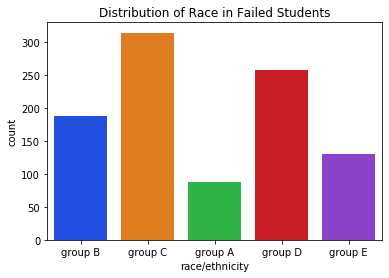

In [27]:
plt.title('Distribution of Race in Failed Students')
sns.countplot(x="race/ethnicity", data = failed, palette="bright")
plt.show()

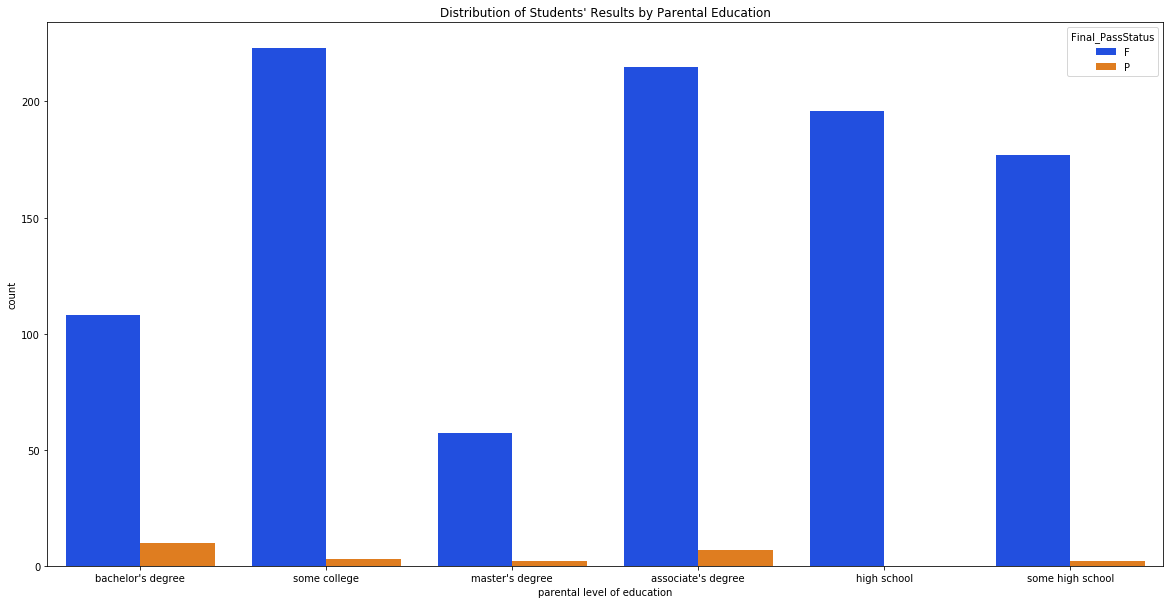

In [28]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Students' Results by Parental Education")
sns.countplot(x='parental level of education', data = df, hue='Final_PassStatus', palette='bright')
plt.show()

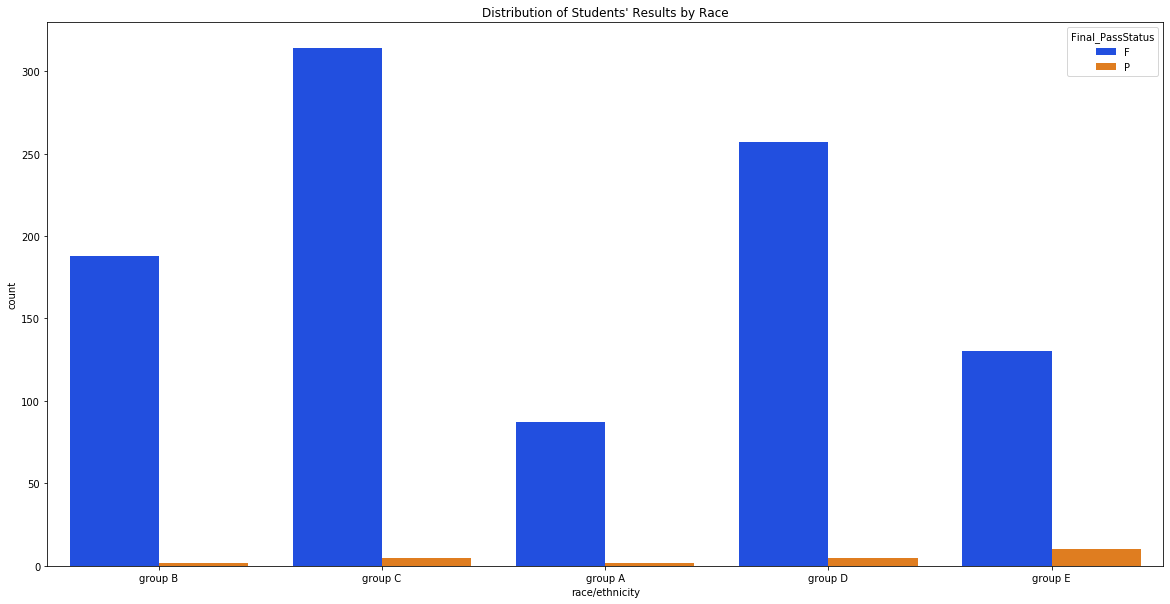

In [29]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Students' Results by Race")
sns.countplot(x='race/ethnicity', data = df, hue='Final_PassStatus', palette='bright')
plt.show()

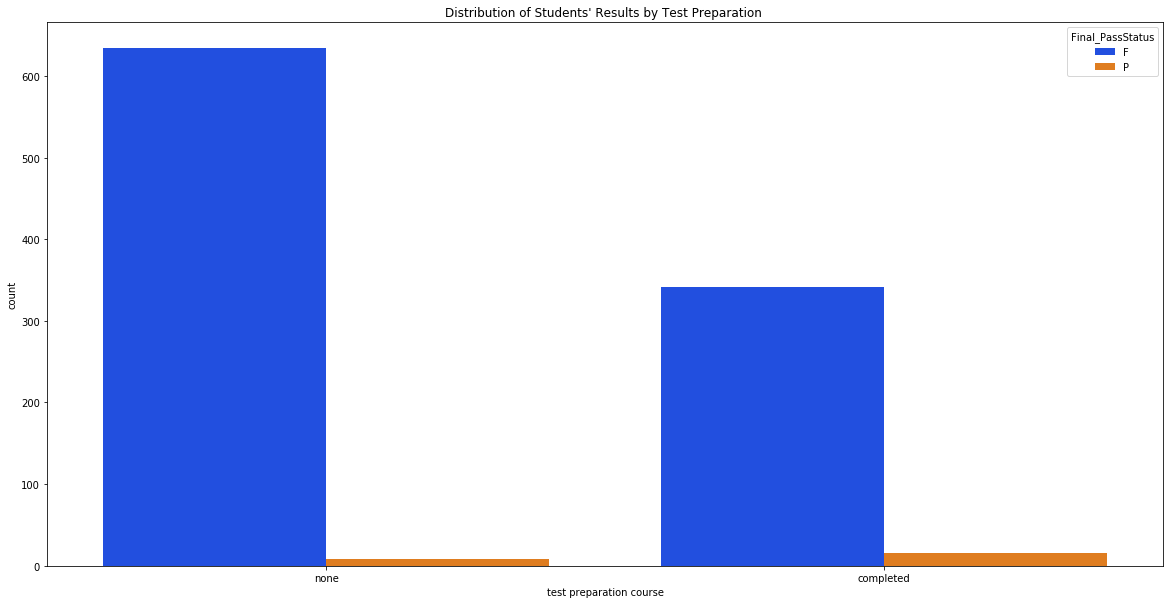

In [30]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Students' Results by Test Preparation ")
sns.countplot(x='test preparation course', data = df, hue='Final_PassStatus', palette='bright')
plt.show()

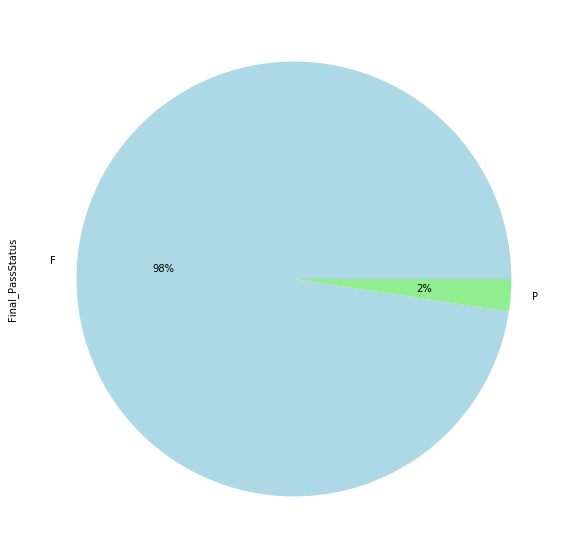

In [31]:
plt.figure(figsize = (20,10))
df['Final_PassStatus'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
plt.show()

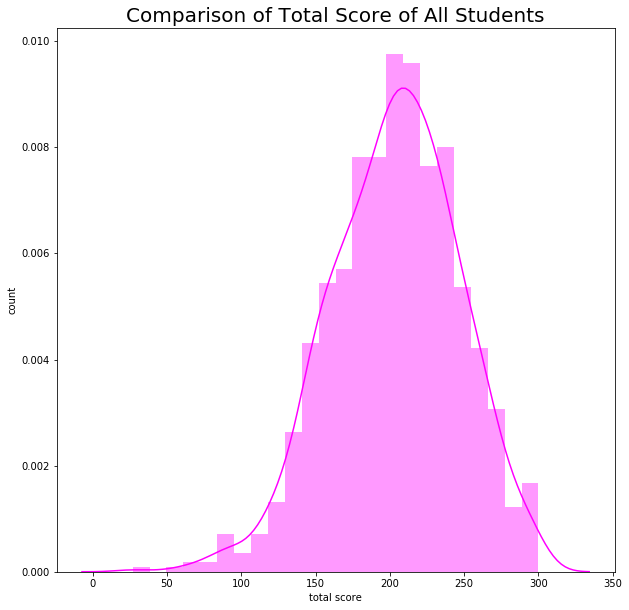

In [32]:
plt.figure(figsize = (10,10))
sns.distplot(df['final score'], color = 'magenta')
plt.title('Comparison of Total Score of All Students', fontweight = 30, fontsize = 20)
plt.xlabel('total score')
plt.ylabel('count')
plt.show()

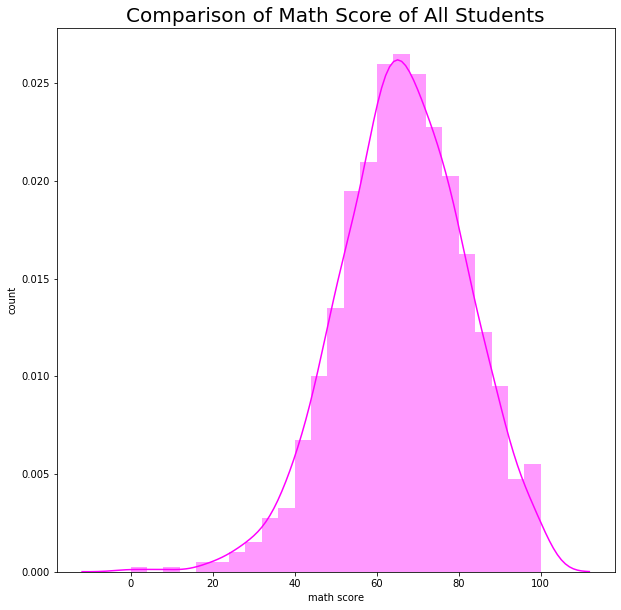

In [33]:
plt.figure(figsize = (10,10))
sns.distplot(df['math score'], color = 'magenta')
plt.title('Comparison of Math Score of All Students', fontweight = 30, fontsize = 20)
plt.xlabel('math score')
plt.ylabel('count')
plt.show()

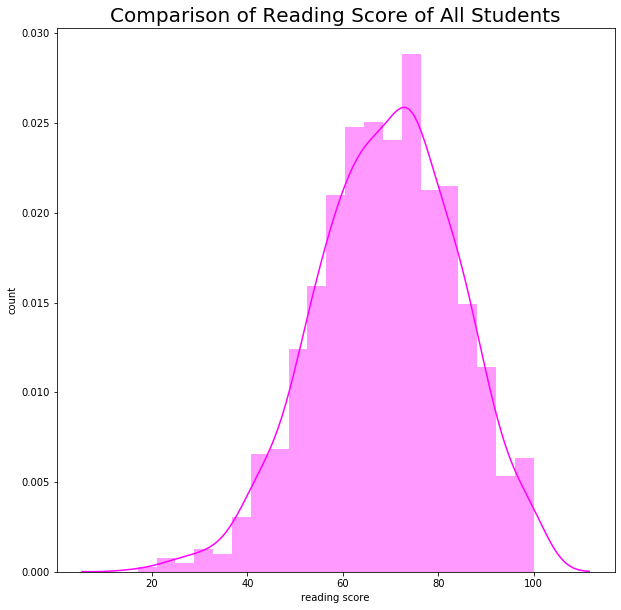

In [34]:
plt.figure(figsize = (10,10))
sns.distplot(df['reading score'], color = 'magenta')
plt.title('Comparison of Reading Score of All Students', fontweight = 30, fontsize = 20)
plt.xlabel('reading score')
plt.ylabel('count')
plt.show()

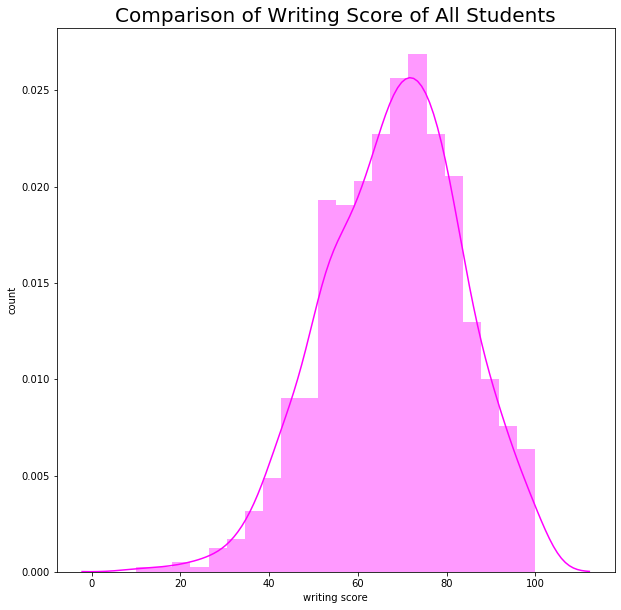

In [35]:
plt.figure(figsize = (10,10))
sns.distplot(df['writing score'], color = 'magenta')
plt.title('Comparison of Writing Score of All Students', fontweight = 30, fontsize = 20)
plt.xlabel('writing score')
plt.ylabel('count')
plt.show()

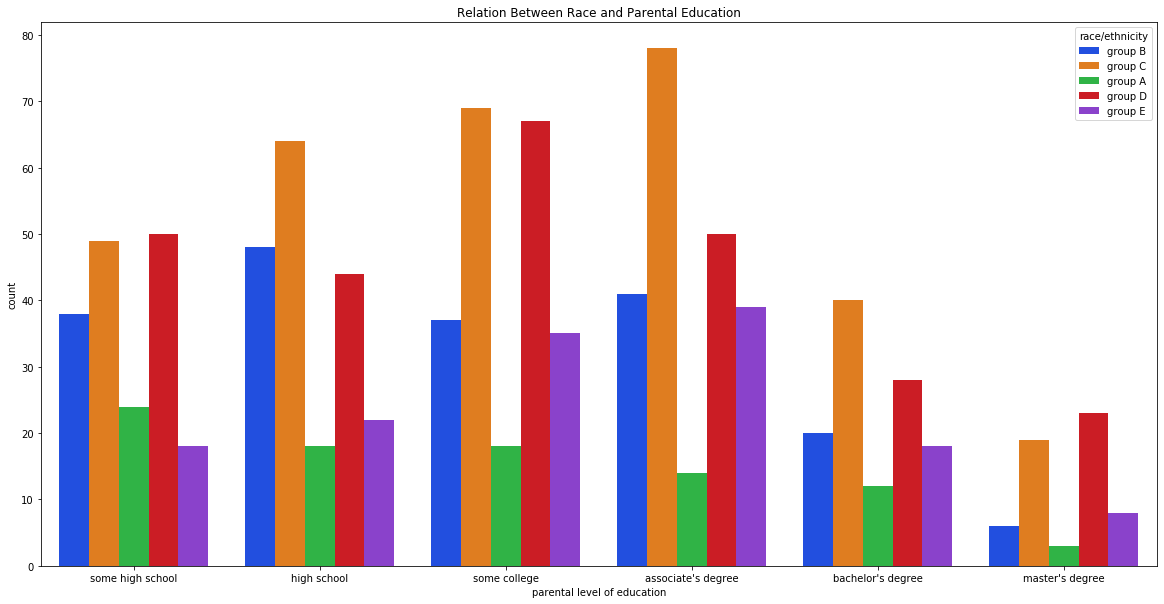

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='parental level of education', data = df, hue='race/ethnicity', order = ['some high school', 'high school', 'some college', 
                "associate's degree", "bachelor's degree", "master's degree"], palette='bright')
plt.title('Relation Between Race and Parental Education')
plt.show()

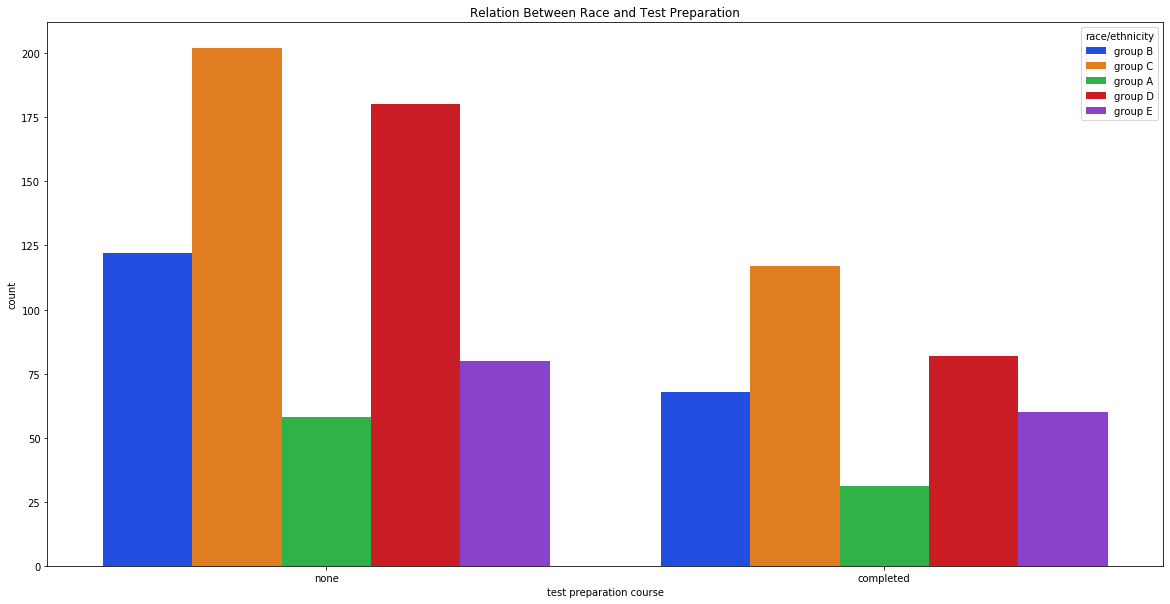

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='test preparation course', data = df, hue='race/ethnicity', palette='bright')
plt.title('Relation Between Race and Test Preparation')
plt.show()

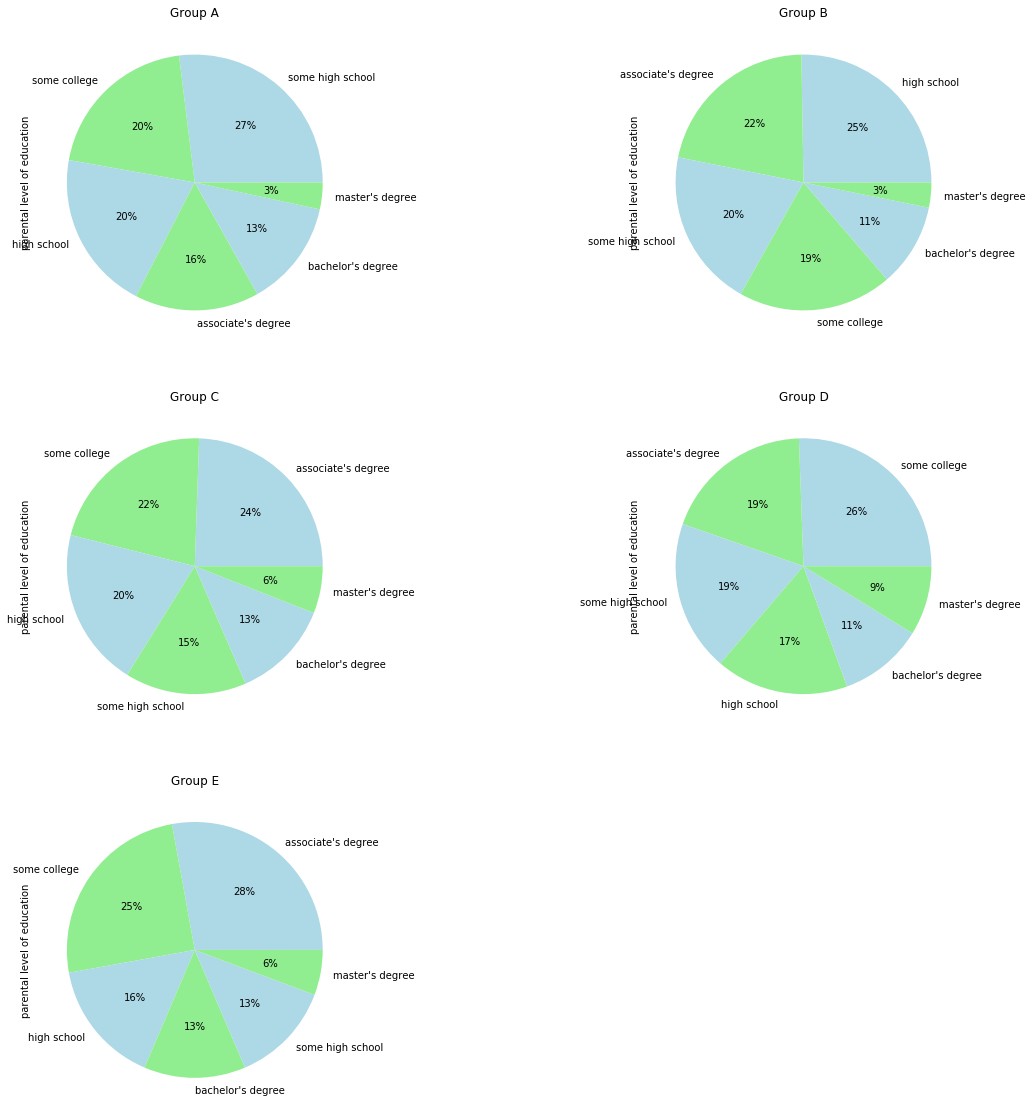

In [38]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3,2,1)
ax1.title.set_text('Group A')
df['parental level of education'][df['race/ethnicity'] == 'group A'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')

ax1 = fig.add_subplot(3,2,2)
ax1.title.set_text('Group B')
df['parental level of education'][df['race/ethnicity'] == 'group B'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')

ax1 = fig.add_subplot(3,2,3)
ax1.title.set_text('Group C')
df['parental level of education'][df['race/ethnicity'] == 'group C'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')

ax1 = fig.add_subplot(3,2,4)
ax1.title.set_text('Group D')
df['parental level of education'][df['race/ethnicity'] == 'group D'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')

ax1 = fig.add_subplot(3,2,5)
ax1.title.set_text('Group E')
df['parental level of education'][df['race/ethnicity'] == 'group E'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
plt.show()

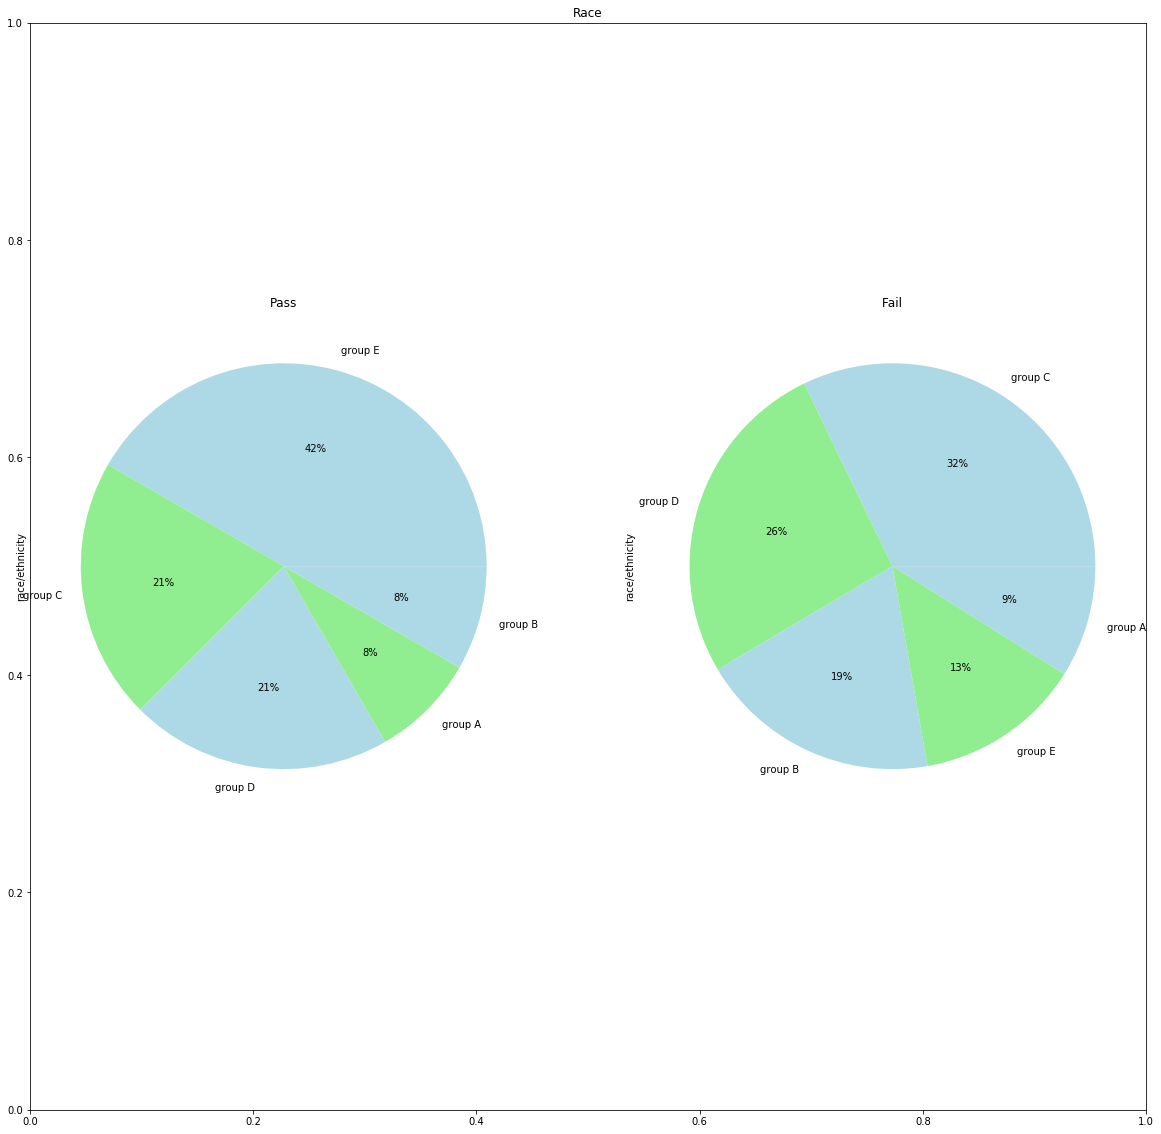

In [39]:
fig = plt.figure(figsize = (20,20))
# plt.subplot(3,2,1)
plt.title('Race')
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text('Pass')
df['race/ethnicity'][df['Final_PassStatus'] == 'P'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
ax1 = fig.add_subplot(1,2,2)
ax1.title.set_text('Fail')
df['race/ethnicity'][df['Final_PassStatus'] == 'F'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
plt.show()

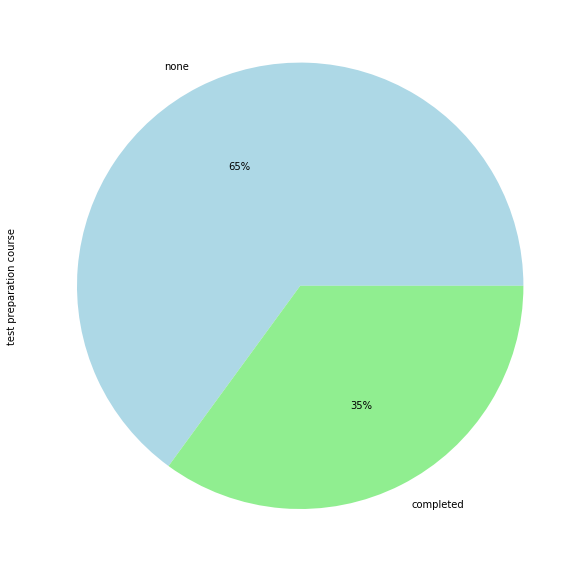

In [40]:
plt.figure(figsize = (10,20))
failed['test preparation course'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
plt.show()

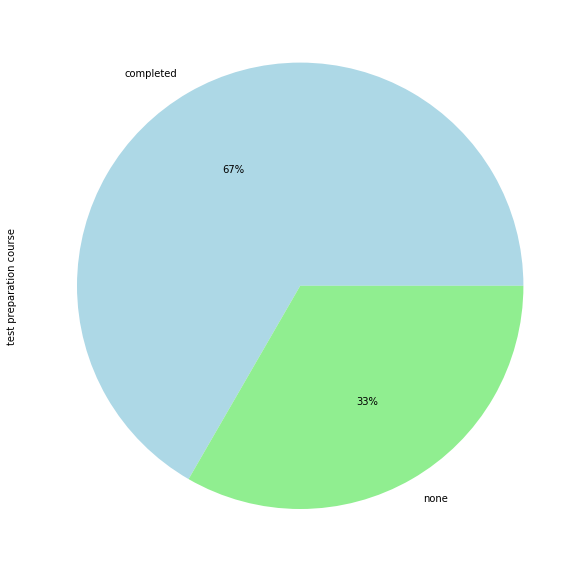

In [41]:
plt.figure(figsize = (10,20))
passed['test preparation course'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
plt.show()

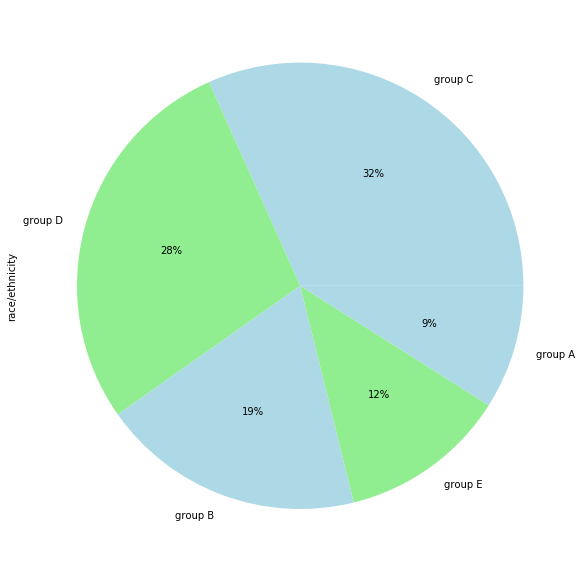

In [42]:
plt.figure(figsize = (10,20))
failed['race/ethnicity'][failed['test preparation course'] == 'none'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'],autopct='%1.0f%%')
plt.show()

So we can see that Female Students, with better Parental Education, and those that have completed the Test Preparation Course have the highest chances of Passing